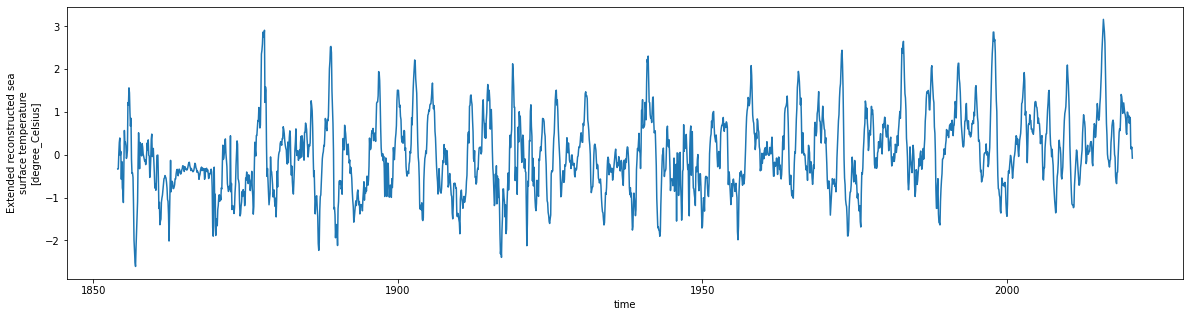

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import cftime

# function to help xarray understand months
def fix_calendar(ds, timevar='T'):
    if ds[timevar].attrs['calendar'] == '360':
        ds[timevar].attrs['calendar'] = '360_day'
    return ds

dl_url = 'http://iridl.ldeo.columbia.edu/'
ERSSTv5_url = 'SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/'
n34box_url = 'Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES/[X/Y]average/'
n34_url = dl_url + ERSSTv5_url + n34box_url + "zlev/removeGRID/yearly-anomalies/dods"

n34_ds = xr.open_dataset(n34_url,decode_times=False)
n34_ds = fix_calendar(n34_ds)
n34_ds = xr.decode_cf(n34_ds)

fig, ax = plt.subplots(figsize=(20,5))
n34_ds.sst.plot();